# Análisis de Datos GeoEspaciales

La unidad mínima de análisis geoespacial es el punto, que se define por el par de coordenadas geográficas latitud y longitud. Estas coordenadas representan la ubicación exacta de un punto en la superficie de la Tierra.
En el siguiente proyecto se introduce a este concepto, además de que se proporciona herramientas para la manipulación de datos espaciales.

Los datos manejados en esté análisis son datos abiertos obtenidos del INEGI de la ciudad de México a febrero del 2022

## Análisis Exploratorio - Nivel de delincuencia en la Ciudad de México

In [1]:
# Importar pandas para el manejo de datos
import pandas as pd

# Importar matplotlib.pyplot para la visualización de datos
import matplotlib.pyplot as plt

**Carga de datos de Latitud y Longitud de las Carpetas de Incidentes**

In [2]:
incidentes_cdmx = pd.read_csv('Desktop/QGIS/Info/carpeta_completa_cdmx_febrero_2022.csv') # Importar datos

In [36]:
incidentes_cdmx.head(6) #Ver datos - El parametro que manejamos es cuantos datos queremos ver

,ao_hechos,mes_hechos,FechaHecho,HoraHecho,ao_inicio,mes_inicio,FechaInicio,HoraInicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,AlcaldiaHechos,municipio_hechos,colonia_datos,fgj_colonia_registro,longitud,latitud
0,2016.0,Enero,2016-01-05,17:00:00,2016,Enero,2016-01-05,18:35:37,LESIONES CULPOSAS,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,DELITO DE BAJO IMPACTO,GUSTAVO A. MADERO,GUSTAVO A MADERO,GRANJAS MODERNAS-SAN JUAN DE ARAGON (AMPL),GRANJAS MODERNAS,-99.103527,19.481076
1,2017.0,Noviembre,2017-11-01,14:00:00,2017,Noviembre,2017-11-01,16:45:20,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,NaN,TLALNEPANTLA DE BAZ,NaN,NaN,0.000000,0.000000
2,2017.0,Noviembre,2017-11-01,16:40:00,2017,Noviembre,2017-11-01,16:56:04,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,IZTACALCO,NaN,TLACOTAL RAMOS MILLAN,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,-99.106072,19.395398
3,2015.0,Diciembre,2015-12-30,20:00:00,2016,Enero,2016-01-05,21:12:42,FRAUDE,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,DELITO DE BAJO IMPACTO,IZTAPALAPA,NaN,CONSEJO AGRARISTA MEXICANO I,CONSEJO AGRARISTA MEXICANO,-99.055887,19.322458
4,2018.0,Mayo,2018-05-16,16:00:00,2018,Mayo,2018-05-22,10:44:45,ROBO A REPARTIDOR CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,IZTAPALAPA,NaN,DEGOLLADO,DESARROLLO URBANO QUETZALCOATL,-99.042786,19.319141
5,2018.0,Mayo,2018-05-21,20:40:00,2018,Mayo,2018-05-22,10:52:18,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,DELITO DE BAJO IMPACTO,IZTACALCO,NaN,INFONAVIT IZTACALCO (U HAB) I,INFONAVIT IZTACALCO,-99.111563,19.386594


In [4]:
'''
Si queremos hacer un analisis descriptivo debemos ver cuantos datos estan incompletos.
Para ello utilizamos el metodo: incidentes_cdmx.isna() 
Lo que devolvera valores booleanos (0-1), si un valor es NA devolvera un "true"; posteriormente sumara todos los valores que son "true"
'''

incidentes_cdmx.isna().sum()

ao_hechos                  198
mes_hechos                 198
FechaHecho                 198
HoraHecho                  198
ao_inicio                    0
mes_inicio                   0
FechaInicio                  0
HoraInicio                   0
delito                       0
fiscalia                     0
agencia                      0
unidad_investigacion       225
categoria_delito             0
AlcaldiaHechos            8664
municipio_hechos        720110
colonia_datos            33948
fgj_colonia_registro     32090
longitud                     0
latitud                      0
dtype: int64

In [5]:
len(incidentes_cdmx) #Cuanta el numero de registros

808871

In [6]:
incidentes_cdmx.AlcaldiaHechos.unique() # El comando obtiene todos los valores únicos que se encuentran en la columna

array(['GUSTAVO A. MADERO', nan, 'IZTACALCO', 'IZTAPALAPA',
       'BENITO JUAREZ', 'CUAUHTEMOC', 'LA MAGDALENA CONTRERAS',
       'AZCAPOTZALCO', 'MIGUEL HIDALGO', 'VENUSTIANO CARRANZA',
       'ALVARO OBREGON', 'MILPA ALTA', 'TLALPAN', 'COYOACAN',
       'XOCHIMILCO', 'CUAJIMALPA DE MORELOS', 'TLAHUAC'], dtype=object)

In [7]:
incidentes_cdmx.delito.unique() #Muestra como datos unicos los delitos que no se repiten

array(['LESIONES CULPOSAS',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA', 'FRAUDE',
       'ROBO A REPARTIDOR CON VIOLENCIA',
       'ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA', 'ROBO DE DINERO',
       'LESIONES INTENCIONALES', 'ABUSO DE AUTORIDAD',
       'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL',
       'ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLENCIA',
       'DELITOS AMBIENTALES', 'ROBO DE OBJETOS',
       'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL',
       'VIOLENCIA FAMILIAR', 'NARCOMENUDEO POSESION SIMPLE',
       'ROBO DE ACCESORIOS DE AUTO',
       'PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO',
       'HOMICIDIO POR ARMA DE FUEGO', 'ROBO A NEGOCIO SIN VIOLENCIA',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA',
       'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
       'ABANDONO DE PERSONA', 'DAÑO EN PROPIEDAD AJENA CULPOSA',
       'AMENAZA

In [8]:
incidentes_cdmx.municipio_hechos.unique() # Muestra como dato unico todos los municipios

array(['GUSTAVO A MADERO', 'TLALNEPANTLA DE BAZ', nan, 'TEXCOCO',
       'SOLIDARIDAD', 'NEZAHUALCOYOTL', 'HUIXQUILUCAN', 'BOCOYNA',
       'IRAPUATO', 'FUERA DE CDMX', 'NAUCALPAN DE JUAREZ', 'TECAMAC',
       'CHALCO', 'CUAUTLA', 'CHIMALHUACAN', 'PUERTO VALLARTA',
       'JOSE MARIA MORELOS', 'LA PAZ', 'ECATEPEC DE MORELOS', 'METEPEC',
       'PACHUCA DE SOTO', 'CUERNAVACA', 'ALTAMIRA', 'LOS CABOS',
       'ACAPULCO DE JUAREZ', 'TULTITLAN', 'TEOTIHUACAN', 'SIN DATO',
       'TAMPICO', 'MERIDA', 'LIBRES', 'HUEHUETOCA', 'ZACAPOAXTLA',
       'PUEBLA', 'AMECA', 'ACOLMAN', 'GUANAJUATO', 'HUITZILAC',
       'COACALCO DE BERRIOZABAL', 'OCOYOACAC', 'TLAXCO',
       'ATIZAPAN DE ZARAGOZA', 'CHICOLOAPAN', 'SAN JOSE DEL RINCON',
       'JIUTEPEC', 'HERMOSILLO', 'ZAPOPAN', 'CHILPANCINGO DE LOS BRAVO',
       'TLALNEPANTLA', 'TOLUCA', 'MINATITLAN',
       'VALLE DE CHALCO SOLIDARIDAD', 'TEHUACAN', 'NICOLAS ROMERO',
       'IXTAPALUCA', 'COLIMA', 'CALNALI', 'NUEVO LAREDO', 'MONTERREY',
       'EZE

In [9]:
incidentes_cdmx['FechaHecho'] =pd.to_datetime(incidentes_cdmx['FechaHecho']) #Convierte los valores en objetos tipo datatime
incidentes_cdmx_sb = incidentes_cdmx[~incidentes_cdmx['FechaHecho'].isna()] # Todos los valores no nulos los toma, por eso se usa el ~ para invertir la condicion. - Los datos los pasa a una nueva variable, pero solo las filas que presentan un valor no nulo en el registro de FechaHecho
# Por lo tanto, incidentes_cdmx_sb es un nuevo dataframe que contendrá solo las filas que tienen valores válidos en la columna 'FechaHecho'.

In [10]:
incidentes_cdmx_sb['mes_anio'] = incidentes_cdmx_sb['FechaHecho'].apply(lambda x: x.strftime('%Y-%m')) # Agrega una nueva columna con el dato de fechaHecho pero  en formato año-mes


C:\Users\arbyk\AppData\Local\Temp\ipykernel_22008\2341076500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidentes_cdmx_sb['mes_anio'] = incidentes_cdmx_sb['FechaHecho'].apply(lambda x: x.strftime('%Y-%m')) # Agrega una nueva columna con el dato de fechaHecho pero  en formato año-mes


In [33]:
incidentes_cdmx_sb.head(6)

,ao_hechos,mes_hechos,FechaHecho,HoraHecho,ao_inicio,mes_inicio,FechaInicio,HoraInicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,AlcaldiaHechos,municipio_hechos,colonia_datos,fgj_colonia_registro,longitud,latitud,mes_anio
0,2016.0,Enero,2016-01-05,17:00:00,2016,Enero,2016-01-05,18:35:37,LESIONES CULPOSAS,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,DELITO DE BAJO IMPACTO,GUSTAVO A. MADERO,GUSTAVO A MADERO,GRANJAS MODERNAS-SAN JUAN DE ARAGON (AMPL),GRANJAS MODERNAS,-99.103527,19.481076,2016-01
1,2017.0,Noviembre,2017-11-01,14:00:00,2017,Noviembre,2017-11-01,16:45:20,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,NaN,TLALNEPANTLA DE BAZ,NaN,NaN,0.000000,0.000000,2017-11
2,2017.0,Noviembre,2017-11-01,16:40:00,2017,Noviembre,2017-11-01,16:56:04,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,IZTACALCO,NaN,TLACOTAL RAMOS MILLAN,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,-99.106072,19.395398,2017-11
3,2015.0,Diciembre,2015-12-30,20:00:00,2016,Enero,2016-01-05,21:12:42,FRAUDE,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,DELITO DE BAJO IMPACTO,IZTAPALAPA,NaN,CONSEJO AGRARISTA MEXICANO I,CONSEJO AGRARISTA MEXICANO,-99.055887,19.322458,2015-12
4,2018.0,Mayo,2018-05-16,16:00:00,2018,Mayo,2018-05-22,10:44:45,ROBO A REPARTIDOR CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,IZTAPALAPA,NaN,DEGOLLADO,DESARROLLO URBANO QUETZALCOATL,-99.042786,19.319141,2018-05
5,2018.0,Mayo,2018-05-21,20:40:00,2018,Mayo,2018-05-22,10:52:18,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,DELITO DE BAJO IMPACTO,IZTACALCO,NaN,INFONAVIT IZTACALCO (U HAB) I,INFONAVIT IZTACALCO,-99.111563,19.386594,2018-05


In [12]:
incidentes_alcaldia = incidentes_cdmx_sb.pivot_table(index='AlcaldiaHechos', columns='mes_anio', values='FechaHecho', aggfunc='count')
# Calcula una tabla pivote a partir del DataFrame incidentes_cdmx_sb, agrupando los datos por 'AlcaldiaHechos' en el eje del índice y por 'mes_anio' en el eje de las columnas. Luego, cuenta el número de ocurrencias de 'FechaHecho' para cada combinación de 'AlcaldiaHechos' y 'mes_anio'.

In [13]:
incidentes_alcaldia.iloc[:,-4:] #  Accede a las últimas n columnas del DataFrame incidentes_alcaldia utilizando la indexación basada en la posición.
# Los dos : se refieren al indice. Despues de la "," se refieren a las columnas "Dame todos los inidices y extrae todas las columnas"

mes_anio,2019-03,2019-04,2019-05,2019-06
AlcaldiaHechos,,,,
ALVARO OBREGON,1467.0,1457.0,1416.0,1166.0
AZCAPOTZALCO,874.0,858.0,838.0,683.0
BENITO JUAREZ,1727.0,1542.0,1650.0,1247.0
COYOACAN,1352.0,1162.0,1183.0,1037.0
CUAJIMALPA DE MORELOS,338.0,275.0,267.0,211.0
CUAUHTEMOC,3247.0,2735.0,2959.0,2204.0
GUSTAVO A. MADERO,2170.0,1898.0,2069.0,1599.0
IZTACALCO,946.0,841.0,763.0,652.0
IZTAPALAPA,3113.0,2982.0,3142.0,2590.0


In [14]:
incidentes_alcaldia.head()

mes_anio,1906-06,1915-01,1915-09,1930-02,1942-10,1954-05,1955-02,1955-12,1956-01,1956-05,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
AlcaldiaHechos,,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1406.0,1515.0,1438.0,1332.0,1423.0,1395.0,1467.0,1457.0,1416.0,1166.0
AZCAPOTZALCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1014.0,1080.0,995.0,935.0,964.0,890.0,874.0,858.0,838.0,683.0
BENITO JUAREZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1627.0,1998.0,1817.0,1734.0,1675.0,1637.0,1727.0,1542.0,1650.0,1247.0
COYOACAN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1420.0,1518.0,1374.0,1232.0,1207.0,1215.0,1352.0,1162.0,1183.0,1037.0
CUAJIMALPA DE MORELOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.0,334.0,270.0,286.0,300.0,305.0,338.0,275.0,267.0,211.0


<Axes: xlabel='mes_anio'>

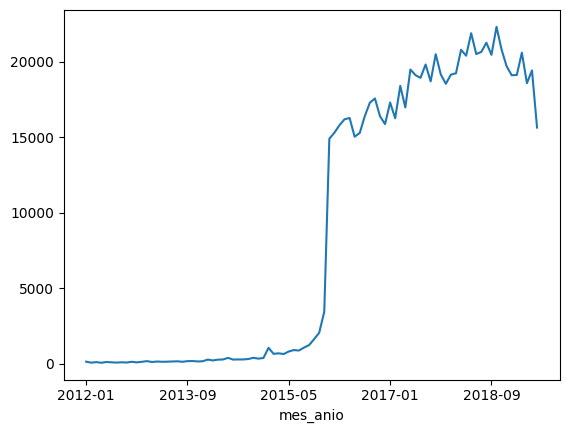

In [15]:
incidentes_alcaldia.iloc[:,-90:].sum().plot() #.plot realiza una grafica de los datos, sumando los valores de cada columna

In [16]:
incidentes_alcaldia.iloc[:,-20:].sum().sum() #Suma primero columnas y luego en general, maneja los ultimos 20 valores del Dataframe

397071.0

In [17]:
incidentes_alcaldia.iloc[:,:].sum().sum() #Suma primero columnas y luego en general (Cantidad de datos global debido a los :,:), son menores a los datos totales vistos al principio porque borramos los registros que no tenian fecha de incidente

800021.0

**Conclusiones del análisis**

Según los datos obtenidos, podemos observar y concluir que hubo un incremento exponencial de delitos en la Ciudad de México a inicios de 2015. Esto podría deberse a aspectos sociales, económicos o políticos que influenciaron en nuestra sociedad. Debido a esto, surge la necesidad de implementar medidas para abordar este problema y realizar un análisis más detallado de las causas para frenar el aumento de la delincuencia.

## Análisis Exploratorio - Tipos de delitos en la Ciudad de México

In [18]:
incidentes_categoria = incidentes_cdmx_sb.pivot_table(index='categoria_delito', columns='mes_anio',values='FechaHecho',aggfunc='count')

> Nota Explicacion de parametros en pivot_table: 
Index: Es la forma en como queremos agrupar los datos, es lo que se muestra por debajo de la grafica y la informacion se agrupa de manera que no haya repeticiones.
Columns: Es como queremos clasificar los datos que vamos a mostrar en la grafica.
Values: Trabaja con columns y con aggfunc, son los valores que mostraremos y afectaran la clasificacion, dependiendo igual de como los manejemos con la funcion.

In [19]:
incidentes_categoria.head()

mes_anio,1906-06,1915-01,1915-09,1930-02,1942-10,1954-05,1955-02,1955-12,1956-01,1956-05,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
categoria_delito,,,,,,,,,,,,,,,,,,,,,
DELITO DE BAJO IMPACTO,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,16940.0,18219.0,16644.0,14978.0,14548.0,14267.0,15851.0,14220.0,15000.0,12119.0
HECHO NO DELICTIVO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,948.0,822.0,571.0,461.0,372.0,470.0,379.0,343.0,379.0,281.0
HOMICIDIO DOLOSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.0,117.0,109.0,155.0,137.0,111.0,151.0,123.0,169.0,125.0
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,218.0,180.0,207.0,191.0,154.0,152.0,163.0,164.0,148.0,114.0
ROBO A CASA HABITACIÓN CON VIOLENCIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,62.0,68.0,58.0,55.0,77.0,64.0,63.0,65.0,50.0


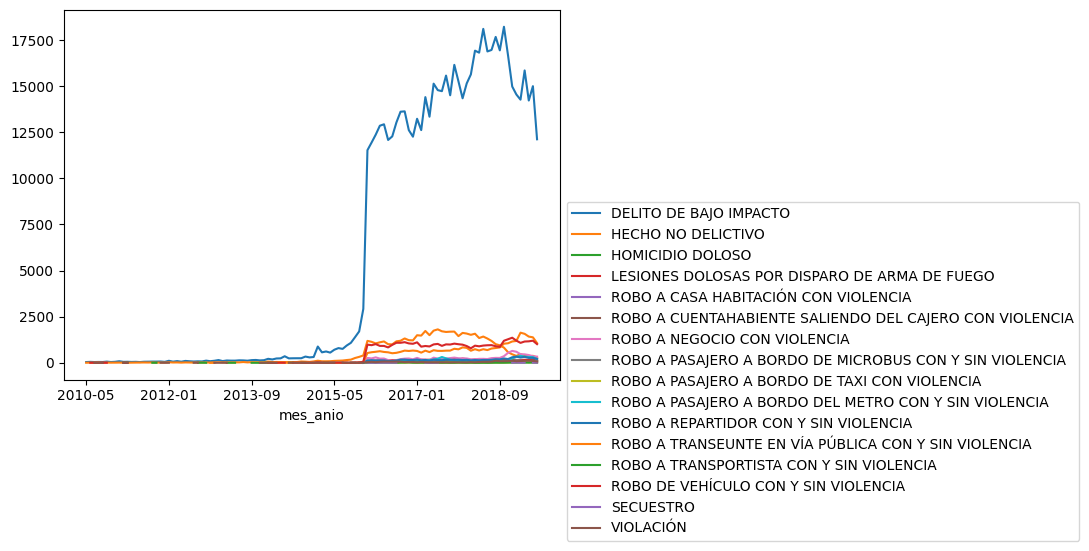

In [20]:
incidentes_categoria.iloc[:,-110:].T.plot() #Transponemos grafica debido al manejo de index
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5)) # Acomodamos leyenda de los valores

In [21]:
incidentes_categoria.sum(axis=1).nlargest(10) #axis sumara a nivel fila debido al parametro "1", si fuera "0" sumaria a nivel columna, y nlargest especifica la cantidad de datos que queremos ver

categoria_delito
DELITO DE BAJO IMPACTO                                     633747.0
HECHO NO DELICTIVO                                          53059.0
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        42674.0
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        33522.0
ROBO A NEGOCIO CON VIOLENCIA                                11575.0
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        7344.0
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                6853.0
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        5497.0
HOMICIDIO DOLOSO                                             4546.0
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      2882.0
dtype: float64

**Conclusiones del análisis**

Se observa una gran variedad de categorias que involucran los delitos cometidos en la Ciudad de México. Podemos destacar que hubo un notable incremento en el número de delitos de bajo impacto en los últimos años, junto con otros incidentes como el robo de vehículos, robo a transeúntes, robo a negocios, entre otros.

Estos datos son preocupantes, especialmente porque la mayoría de estos delitos alcanzaron su punto máximo en el año 2017. Sin embargo, a partir de ese año hubo un decremento en la cantidad de algunos delitos, como el de bajo impacto, por lo que se requeriría un análisis más exhaustivo de las variables que generan este fenómeno y la implementación de medidas preventivas para reducir aún más estos índices.

## Análisis Exploratorio - Delitos en alcaldias

In [34]:
robo_vehiculo = incidentes_cdmx_sb[incidentes_cdmx_sb['categoria_delito'] == 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA']
#filtra el DataFrame incidentes_cdmx_sb para seleccionar solo las filas donde el valor en la columna 'categoria_delito' es igual a 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA' y asigna los resultados a una nueva variable llamada robos_vehiculos
robo_vehiculo.head(6)

,ao_hechos,mes_hechos,FechaHecho,HoraHecho,ao_inicio,mes_inicio,FechaInicio,HoraInicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,AlcaldiaHechos,municipio_hechos,colonia_datos,fgj_colonia_registro,longitud,latitud,mes_anio
1,2017.0,Noviembre,2017-11-01,14:00:00,2017,Noviembre,2017-11-01,16:45:20,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,NaN,TLALNEPANTLA DE BAZ,NaN,NaN,0.000000,0.000000,2017-11
12,2017.0,Noviembre,2017-11-01,14:30:00,2017,Noviembre,2017-11-01,20:16:40,ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLE...,INVESTIGACIÓN EN MAGDALENA CONTRERAS,MC-2,UI-1CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,LA MAGDALENA CONTRERAS,NaN,BARRANCA SECA,LA MAGDALENA,-99.242737,19.305001,2017-11
27,2017.0,Octubre,2017-10-31,22:30:00,2017,Noviembre,2017-11-02,10:42:54,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-2SD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,AZCAPOTZALCO,NaN,COLTONGO,COLTONGO,-99.154019,19.483137,2017-10
65,2018.0,Mayo,2018-05-14,12:00:00,2018,Mayo,2018-05-19,13:03:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,INVESTIGACIÓN EN TLALPAN,TLP-1,UI-2CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,TLALPAN,NaN,HEROES DE PADIERNA I,HÉROES DE PADIERNA,-99.223490,19.288815,2018-05
98,2016.0,Enero,2016-01-09,09:00:00,2016,Enero,2016-01-16,16:39:32,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,INVESTIGACIÓN EN CUAUHTEMOC,CUH-7,UI-3SD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,CUAUHTEMOC,NaN,HIPODROMO CONDESA,HIPÓDROMO CONDESA,-99.176247,19.410522,2016-01
110,2016.0,Enero,2016-01-15,06:35:00,2016,Enero,2016-01-15,11:36:01,ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLE...,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-1,UI-2SD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,VENUSTIANO CARRANZA,NaN,NICOLAS BRAVO,NICOLÁS BRAVO,-99.123262,19.453092,2016-01


In [23]:
robo_vehiculo_alcaldia = robo_vehiculo.pivot_table(index='AlcaldiaHechos',columns='mes_anio', values='FechaHecho',aggfunc='count')

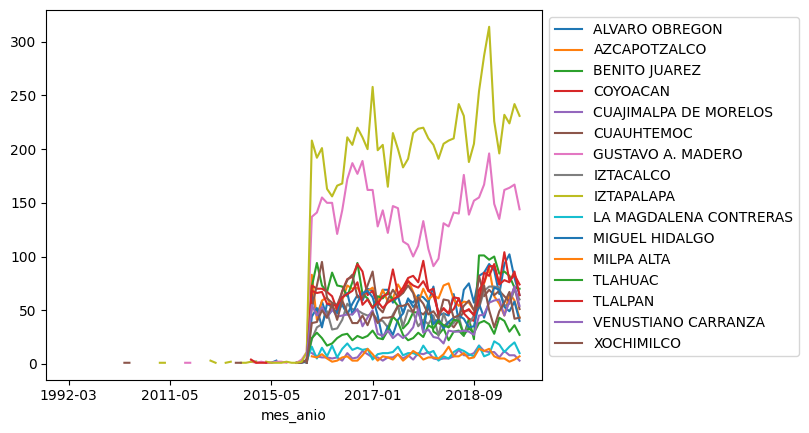

In [24]:
robo_vehiculo_alcaldia.iloc[:,-120:].T.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))


In [25]:
robo_vehiculo_alcaldia.sum(axis=1).nlargest(10)

AlcaldiaHechos
IZTAPALAPA           8911.0
GUSTAVO A. MADERO    6074.0
COYOACAN             2943.0
TLALPAN              2721.0
ALVARO OBREGON       2674.0
AZCAPOTZALCO         2657.0
BENITO JUAREZ        2582.0
CUAUHTEMOC           2524.0
XOCHIMILCO           2058.0
MIGUEL HIDALGO       2046.0
dtype: float64

In [26]:
robo_vehiculo_alcaldia

mes_anio,1992-03,1995-02,1998-11,2001-01,2001-02,2001-09,2001-12,2005-03,2006-04,2007-01,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
AlcaldiaHechos,,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,57.0,82.0,85.0,93.0,87.0,65.0,93.0,102.0,80.0,64.0
AZCAPOTZALCO,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,50.0,58.0,75.0,89.0,63.0,56.0,45.0,66.0,59.0,43.0
BENITO JUAREZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,23.0,101.0,101.0,97.0,100.0,84.0,86.0,82.0,71.0,70.0
COYOACAN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,40.0,69.0,76.0,91.0,91.0,74.0,104.0,77.0,83.0,74.0
CUAJIMALPA DE MORELOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,17.0,12.0,11.0,11.0,6.0,12.0,8.0,8.0,3.0
CUAUHTEMOC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,46.0,82.0,63.0,69.0,64.0,68.0,63.0,58.0,72.0,51.0
GUSTAVO A. MADERO,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,152.0,155.0,167.0,196.0,149.0,135.0,162.0,164.0,167.0,144.0
IZTACALCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,52.0,68.0,72.0,72.0,71.0,54.0,56.0,69.0,60.0
IZTAPALAPA,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,205.0,254.0,287.0,314.0,226.0,196.0,232.0,224.0,242.0,231.0


In [35]:
bajo_impacto = incidentes_cdmx_sb[incidentes_cdmx_sb['categoria_delito'] == 'DELITO DE BAJO IMPACTO']
bajo_impacto.head(6)

,ao_hechos,mes_hechos,FechaHecho,HoraHecho,ao_inicio,mes_inicio,FechaInicio,HoraInicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,AlcaldiaHechos,municipio_hechos,colonia_datos,fgj_colonia_registro,longitud,latitud,mes_anio
0,2016.0,Enero,2016-01-05,17:00:00,2016,Enero,2016-01-05,18:35:37,LESIONES CULPOSAS,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,DELITO DE BAJO IMPACTO,GUSTAVO A. MADERO,GUSTAVO A MADERO,GRANJAS MODERNAS-SAN JUAN DE ARAGON (AMPL),GRANJAS MODERNAS,-99.103527,19.481076,2016-01
3,2015.0,Diciembre,2015-12-30,20:00:00,2016,Enero,2016-01-05,21:12:42,FRAUDE,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,DELITO DE BAJO IMPACTO,IZTAPALAPA,NaN,CONSEJO AGRARISTA MEXICANO I,CONSEJO AGRARISTA MEXICANO,-99.055887,19.322458,2015-12
5,2018.0,Mayo,2018-05-21,20:40:00,2018,Mayo,2018-05-22,10:52:18,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,DELITO DE BAJO IMPACTO,IZTACALCO,NaN,INFONAVIT IZTACALCO (U HAB) I,INFONAVIT IZTACALCO,-99.111563,19.386594,2018-05
6,2018.0,Mayo,2018-05-22,06:20:00,2018,Mayo,2018-05-22,11:09:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,DELITO DE BAJO IMPACTO,BENITO JUAREZ,NaN,EXTREMADURA INSURGENTES,TLACOQUEMECATL,-99.177100,19.379581,2018-05
7,2016.0,Enero,2016-01-02,21:20:00,2016,Enero,2016-01-05,19:37:09,ROBO DE DINERO,INVESTIGACIÓN EN IZTACALCO,IZC-1,UI-1CD,DELITO DE BAJO IMPACTO,IZTACALCO,NaN,LOS REYES,LOS REYES,-99.117183,19.398040,2016-01
8,2017.0,Noviembre,2017-11-01,17:15:00,2017,Noviembre,2017-11-01,18:48:18,LESIONES INTENCIONALES,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,STCMZV,UI-1CD,DELITO DE BAJO IMPACTO,CUAUHTEMOC,NaN,CENTRO IV,CENTRO,-99.132449,19.431791,2017-11


In [28]:
bajo_impacto_alcaldia = bajo_impacto.pivot_table(index='AlcaldiaHechos', columns='mes_anio', values='FechaHecho', aggfunc='count')

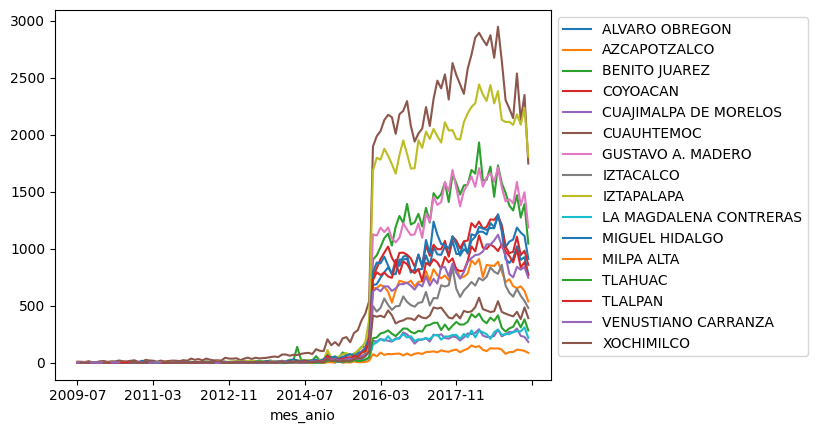

In [29]:
bajo_impacto_alcaldia.iloc[:,-120:].T.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [30]:
bajo_impacto_alcaldia.sum(axis=1).nlargest(10)

AlcaldiaHechos
CUAUHTEMOC             104818.0
IZTAPALAPA              87314.0
BENITO JUAREZ           60437.0
GUSTAVO A. MADERO       59605.0
COYOACAN                44182.0
MIGUEL HIDALGO          43026.0
ALVARO OBREGON          42191.0
TLALPAN                 38185.0
VENUSTIANO CARRANZA     34317.0
AZCAPOTZALCO            31888.0
dtype: float64

In [31]:
bajo_impacto_alcaldia

mes_anio,1906-06,1915-01,1930-02,1942-10,1954-05,1955-02,1955-12,1956-01,1956-05,1958-10,...,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
AlcaldiaHechos,,,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1193.0,1284.0,1212.0,1017.0,1064.0,1082.0,1187.0,1143.0,1114.0,912.0
AZCAPOTZALCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,850.0,887.0,802.0,711.0,734.0,673.0,655.0,672.0,631.0,538.0
BENITO JUAREZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1457.0,1732.0,1576.0,1492.0,1379.0,1337.0,1471.0,1275.0,1394.0,1046.0
COYOACAN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1255.0,1297.0,1195.0,1018.0,962.0,975.0,1107.0,945.0,984.0,860.0
CUAJIMALPA DE MORELOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236.0,292.0,233.0,251.0,273.0,267.0,302.0,237.0,228.0,184.0
CUAUHTEMOC,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,2676.0,2948.0,2650.0,2306.0,2230.0,2147.0,2538.0,2132.0,2350.0,1749.0
GUSTAVO A. MADERO,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1589.0,1715.0,1540.0,1416.0,1436.0,1400.0,1587.0,1382.0,1497.0,1187.0
IZTACALCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,800.0,781.0,861.0,678.0,615.0,581.0,649.0,589.0,543.0,482.0
IZTAPALAPA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2276.0,2384.0,2132.0,2113.0,2114.0,2088.0,2181.0,2089.0,2236.0,1808.0


**Conclusiones del análisis**

Podemos observar que los niveles de delincuencia varían en cada alcaldía dependiendo del tipo de delito. Además, los datos disponibles sugieren que los aumentos y disminuciones en el número de delitos están relacionados con el nivel de seguridad en estas áreas, lo que afecta especialmente a aquellas que carecen más de este aspecto. Es crucial considerar esta información para implementar métodos y planificaciones que ayuden a prevenir estas situaciones para poder reducir el porcentaje de delitos.

## Conclusiones de los Análisis de Datos Geoespaciales
Los datos geoespaciales son información que representan características geográficas de objetos, fenómenos o eventos en la Tierra.  Estos datos están vinculados a coordenadas geográficas, como latitud y longitud, y pueden incluir atributos adicionales que describen las características de los elementos en el espacio, como la altitud, el área, la temperatura, el nombre de la zona, entre otros.
Es fundamental poder manejar datos geoespaciales, ya que proporcionan información representativa que describe características físicas de la Tierra. Esta información nos permite representar y comprender relaciones espaciales que pueden aplicarse en diversos ámbitos, como la toma de decisiones, el análisis de impacto ambiental y social, la identificación de tendencias y patrones, así como en aplicaciones y sistemas de navegación. Por lo que es crucial darles un enfoque adecuado para aprovechar al máximo la información que nos ofrecen.
